In [161]:

raw_data= pd.read_excel("c:/Users/ksuma/Desktop/Book1.xlsx")
#south_africa=pd.read_excel("c:/Users/ksuma/Desktop/pharma_data_2.xlsx",sheet_name='SOUTH AFRICA')
raw_data.dropna(inplace=True)
raw_data

,year,Pharma_imports,Aging population country to export (DATA_WORLD BANK),exchange rate in currency(CURRENCIES.ZONE,labor cost in parent country,labor cost in coutry to export,Tariff,Inflation rate,diff,population,old_age,india_export
0,2010,61975885,13.100,44.6450,100,2589.41000,3.71,1.600,991.701007,309321666,4.052114e+07,1674983
1,2011,66150067,13.475,47.9229,115,2779.52820,3.72,3.200,1390.861456,311556874,4.198229e+07,2349165
2,2012,65004006,13.850,53.2112,115,3086.24960,3.57,2.100,1788.474837,313830990,4.346559e+07,3020734
3,2013,63313660,14.225,60.5019,115,3509.11020,3.55,1.500,2145.757845,315993715,4.495011e+07,3624185
4,2014,73042299,14.600,61.1436,137,3546.32880,3.54,1.600,2276.239787,318301008,4.647195e+07,3844569
...,...,...,...,...,...,...,...,...,...,...,...,...
135,2015,20969318,17.920,72.6618,160,3429.63696,5.69,0.600,98.403197,100835458,1.806971e+07,166203
136,2016,22012273,18.372,71.8412,160,3390.90464,5.62,0.317,84.946714,103603501,1.903404e+07,143475
137,2017,25633162,18.792,76.6083,176,3615.91176,5.70,1.381,75.615157,106400024,1.999469e+07,134828
138,2018,29820130,19.196,79.9910,176,3775.57520,5.75,1.703,118.293665,109224559,2.096675e+07,127714


In [163]:

raw_data.columns=["year","export_2","aging","exchange_rate","minimum_wage_india","minimum_wage_importer","tariff",
                  "inflation","diff","population","old_age","india_export"]
#sns.scatterplot(raw_data["inflation"],raw_data["differnece_in_wage"])

<AxesSubplot:xlabel='difference_in_wage', ylabel='inflation'>

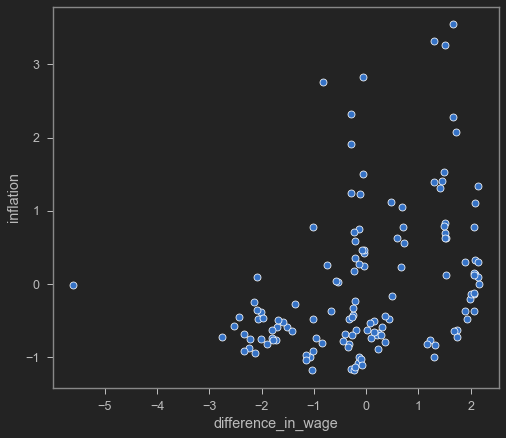

In [181]:
#USA.columns=["export","aging",]
raw_data["difference_in_wage"] = raw_data["minimum_wage_india"] - raw_data["minimum_wage_importer"]
features =["india_export","old_age","exchange_rate","tariff","inflation","difference_in_wage"]
raw_data
sns.scatterplot(raw_data["difference_in_wage"],raw_data["inflation"])


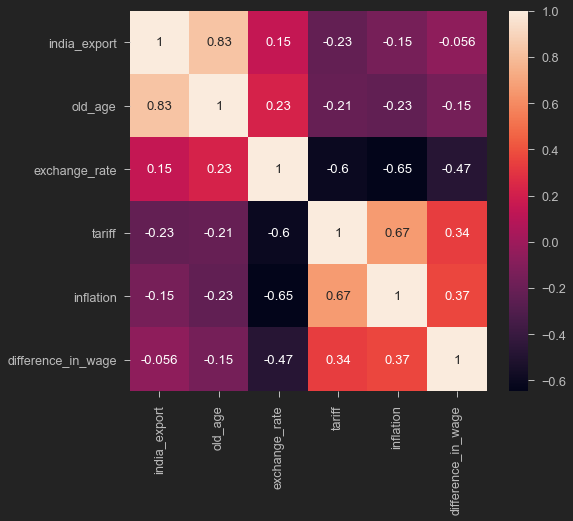

In [182]:
sns.heatmap(raw_data[features].corr(),annot=True)
plt.show()

In [177]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import scipy.stats
for i in raw_data.columns:
    raw_data[i] = scipy.stats.zscore(raw_data[i])
raw_data

,year,export_2,aging,exchange_rate,minimum_wage_india,minimum_wage_importer,tariff,inflation,diff,population,old_age,india_export,difference_in_wage
0,-1.600781,1.793075,0.191636,0.109720,-1.540906,0.254595,-0.987040,-0.728034,1.067216,2.508651,2.404890,1.072881,1.248168
1,-1.249390,1.966227,0.251953,0.196692,-1.014267,0.348162,-0.984116,-0.269268,1.701442,2.536070,2.527127,1.705579,0.947112
2,-0.897999,1.918687,0.312270,0.337006,-1.014267,0.499115,-1.027977,-0.584669,2.333210,2.563966,2.651218,2.335825,1.052049
3,-0.546608,1.848568,0.372586,0.530450,-1.014267,0.707226,-1.033825,-0.756707,2.900897,2.590496,2.775410,2.902145,1.196720
4,-0.195217,2.252129,0.432903,0.547476,-0.241864,0.725543,-1.036749,-0.728034,3.108220,2.618799,2.902725,3.108968,0.672506
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,0.156174,0.092053,0.966909,0.853088,0.565649,0.668113,-0.408085,-1.014762,-0.352146,-0.048796,0.526639,-0.343061,0.071230
136,0.507565,0.135316,1.039611,0.831315,0.565649,0.649051,-0.428553,-1.095907,-0.373527,-0.014841,0.607312,-0.364391,0.057978
137,0.858956,0.285517,1.107166,0.957801,1.127397,0.759789,-0.405161,-0.790827,-0.388354,0.019463,0.687680,-0.372505,-0.255548
138,1.210347,0.459199,1.172147,1.047554,1.127397,0.838367,-0.390541,-0.698501,-0.320542,0.054111,0.769000,-0.379182,-0.200923


In [184]:
import statsmodels.api as sm # import statsmodels 

X = raw_data[["old_age",'difference_in_wage', 'tariff', 'inflation']] ## X usually means our input variables (or independent variables)
y = raw_data['india_export'] 
X = sm.add_constant(X) 
model = sm.OLS(y, X.astype(float)).fit() 
predictions = model.predict(X)


model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           india_export   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     79.35
Date:                Mon, 17 Aug 2020   Prob (F-statistic):           6.09e-34
Time:                        04:04:08   Log-Likelihood:                -108.13
No. Observations:                 135   AIC:                             226.3
Df Residuals:                     130   BIC:                             240.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -1.57e-16      0.047  -3.32e-15      1.000      -0.094       0.094
old_age                0.8379      0.049     17.148      0.000       0.741       0.935
difference_in_wage     0.0567      0.036      1.587      0.115      -0.014       0.127
tariff                -0.1596      0.064     -2.492      0.014      -0.286      -0.033
inflation              0.1214      0.065      1.865      0.064      -0.007       0.250
==============================================================================
Omnibus:                       19.838   Durbin-Watson:                   0.328
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.551
Skew:                           0.626   Prob(JB):                     2.58e-09
Kurtosis:                       5.338   Cond. No.                         2.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='imported', ylabel='india_export'>

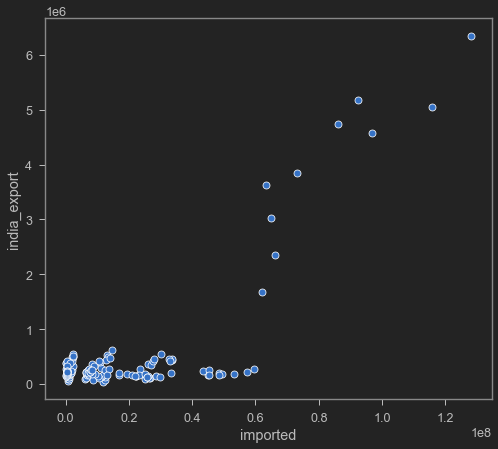

In [27]:
sns.scatterplot(raw_data[""])

In [171]:
import scipy.stats
for i in raw_data.columns:
    raw_data[i] = scipy.stats.zscore(raw_data[i])
raw_data

,year,export_2,aging,exchange_rate,minimum_wage_india,minimum_wage_importer,tariff,inflation,diff,population,old_age,india_export,difference_in_wage
0,-1.600781,1.793075,0.191636,0.109720,-1.540906,0.254595,-0.987040,-0.728034,1.067216,2.508651,2.404890,1.072881,0.276034
1,-1.249390,1.966227,0.251953,0.196692,-1.014267,0.348162,-0.984116,-0.269268,1.701442,2.536070,2.527127,1.705579,0.362168
2,-0.897999,1.918687,0.312270,0.337006,-1.014267,0.499115,-1.027977,-0.584669,2.333210,2.563966,2.651218,2.335825,0.513033
3,-0.546608,1.848568,0.372586,0.530450,-1.014267,0.707226,-1.033825,-0.756707,2.900897,2.590496,2.775410,2.902145,0.721023
4,-0.195217,2.252129,0.432903,0.547476,-0.241864,0.725543,-1.036749,-0.728034,3.108220,2.618799,2.902725,3.108968,0.728508
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,0.156174,0.092053,0.966909,0.853088,0.565649,0.668113,-0.408085,-1.014762,-0.352146,-0.048796,0.526639,-0.343061,0.659799
136,0.507565,0.135316,1.039611,0.831315,0.565649,0.649051,-0.428553,-1.095907,-0.373527,-0.014841,0.607312,-0.364391,0.640748
137,0.858956,0.285517,1.107166,0.957801,1.127397,0.759789,-0.405161,-0.790827,-0.388354,0.019463,0.687680,-0.372505,0.743551
138,1.210347,0.459199,1.172147,1.047554,1.127397,0.838367,-0.390541,-0.698501,-0.320542,0.054111,0.769000,-0.379182,0.822084


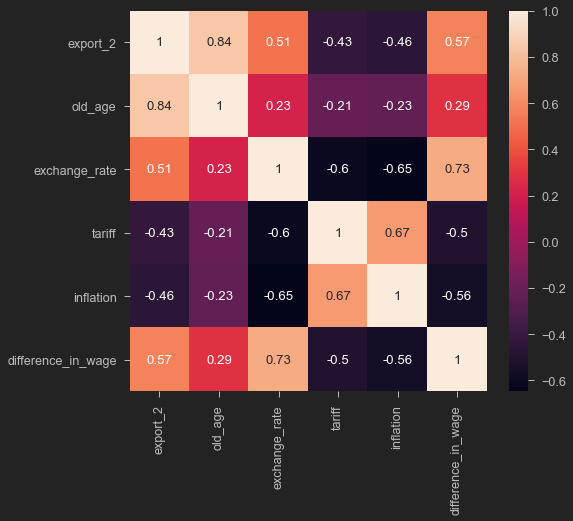

In [172]:
# descripteve analysis of US
sns.heatmap(raw_data[features].corr(),annot=True)
plt.show()


<AxesSubplot:xlabel='tariff', ylabel='india_export'>

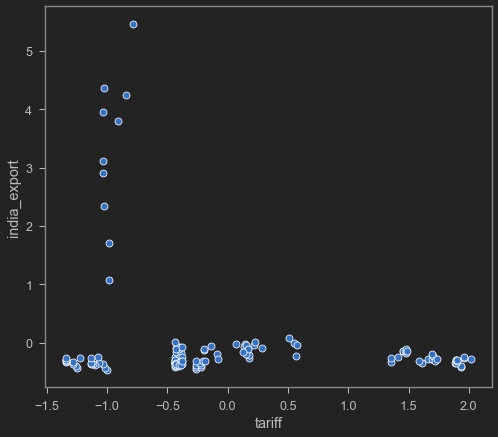

In [185]:
sns.scatterplot(raw_data["tariff"],raw_data["india_export"])